
Значение h=0.0025 м

Подогнанное значение h=0.015 м


Цилиндрическая жесткость D=61813.1868131868


Волновое число k=10.495304233118832 м^-1


Длина краевого эффекта λ=0.2993331668915541 м


Коэффициенты C равны:
C1=-0.00034984347443729427
C2=-0.00034984347443729427



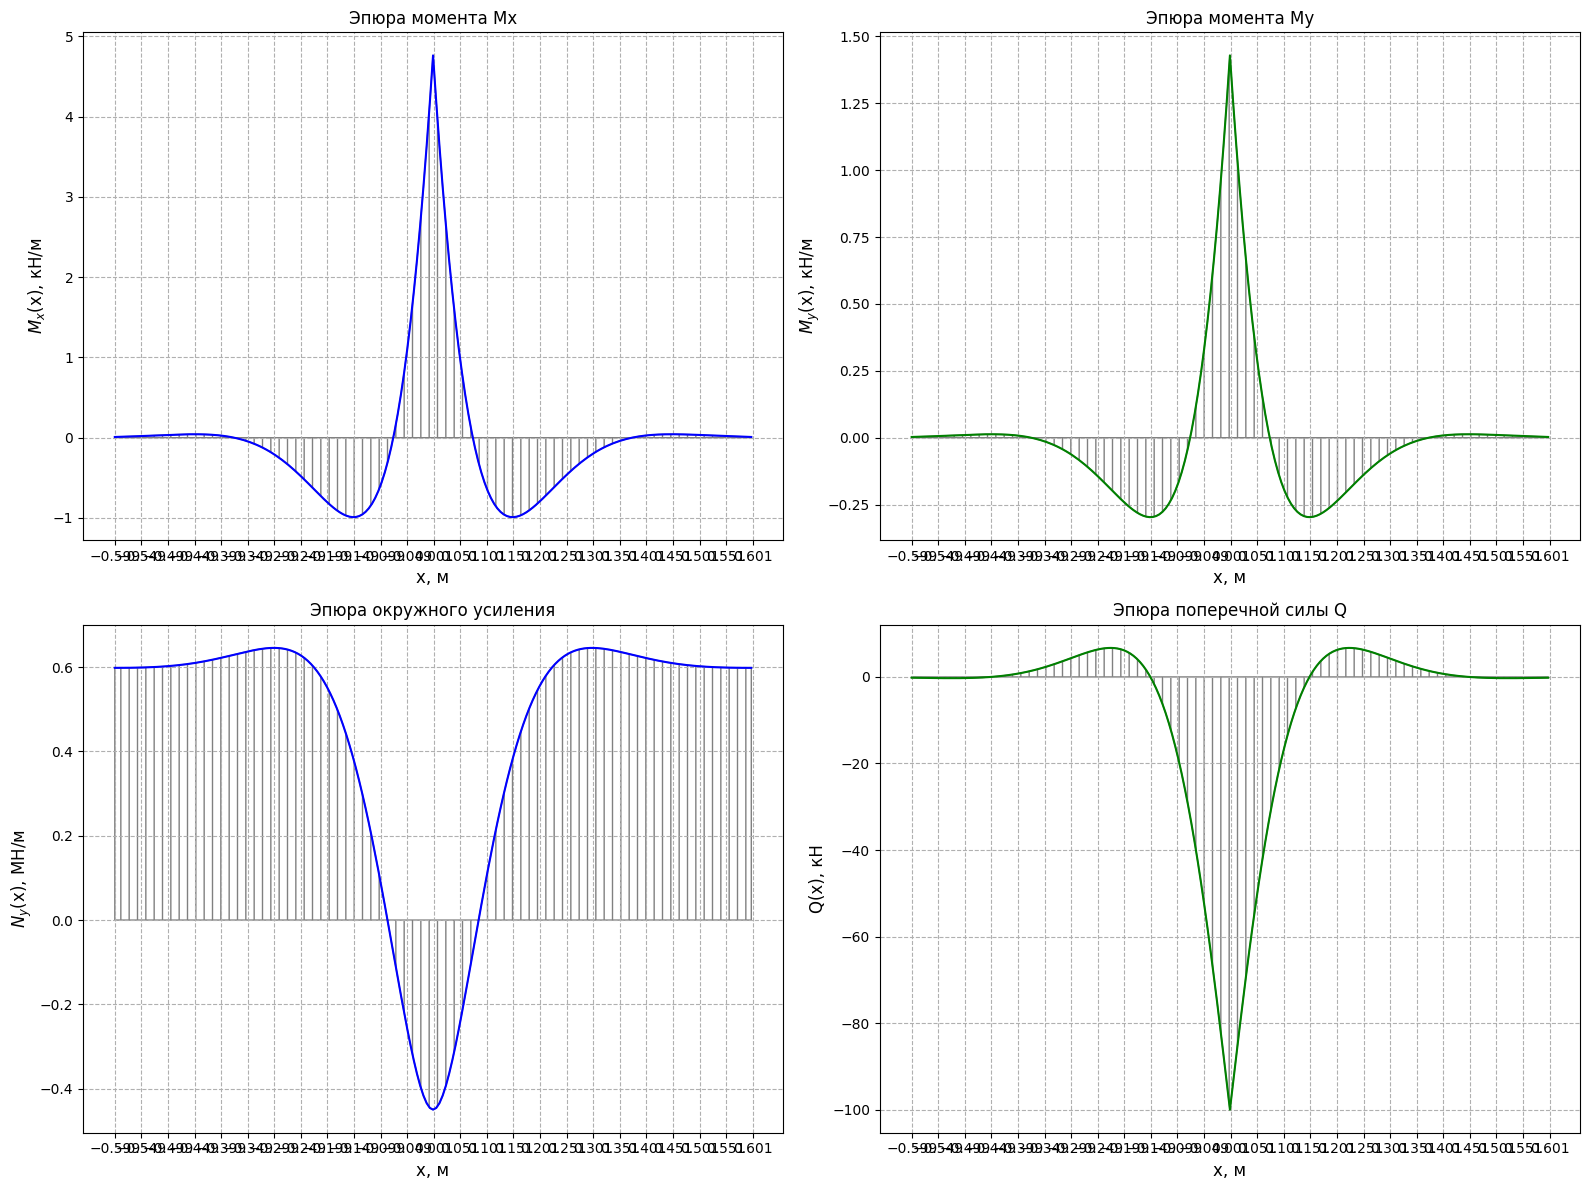

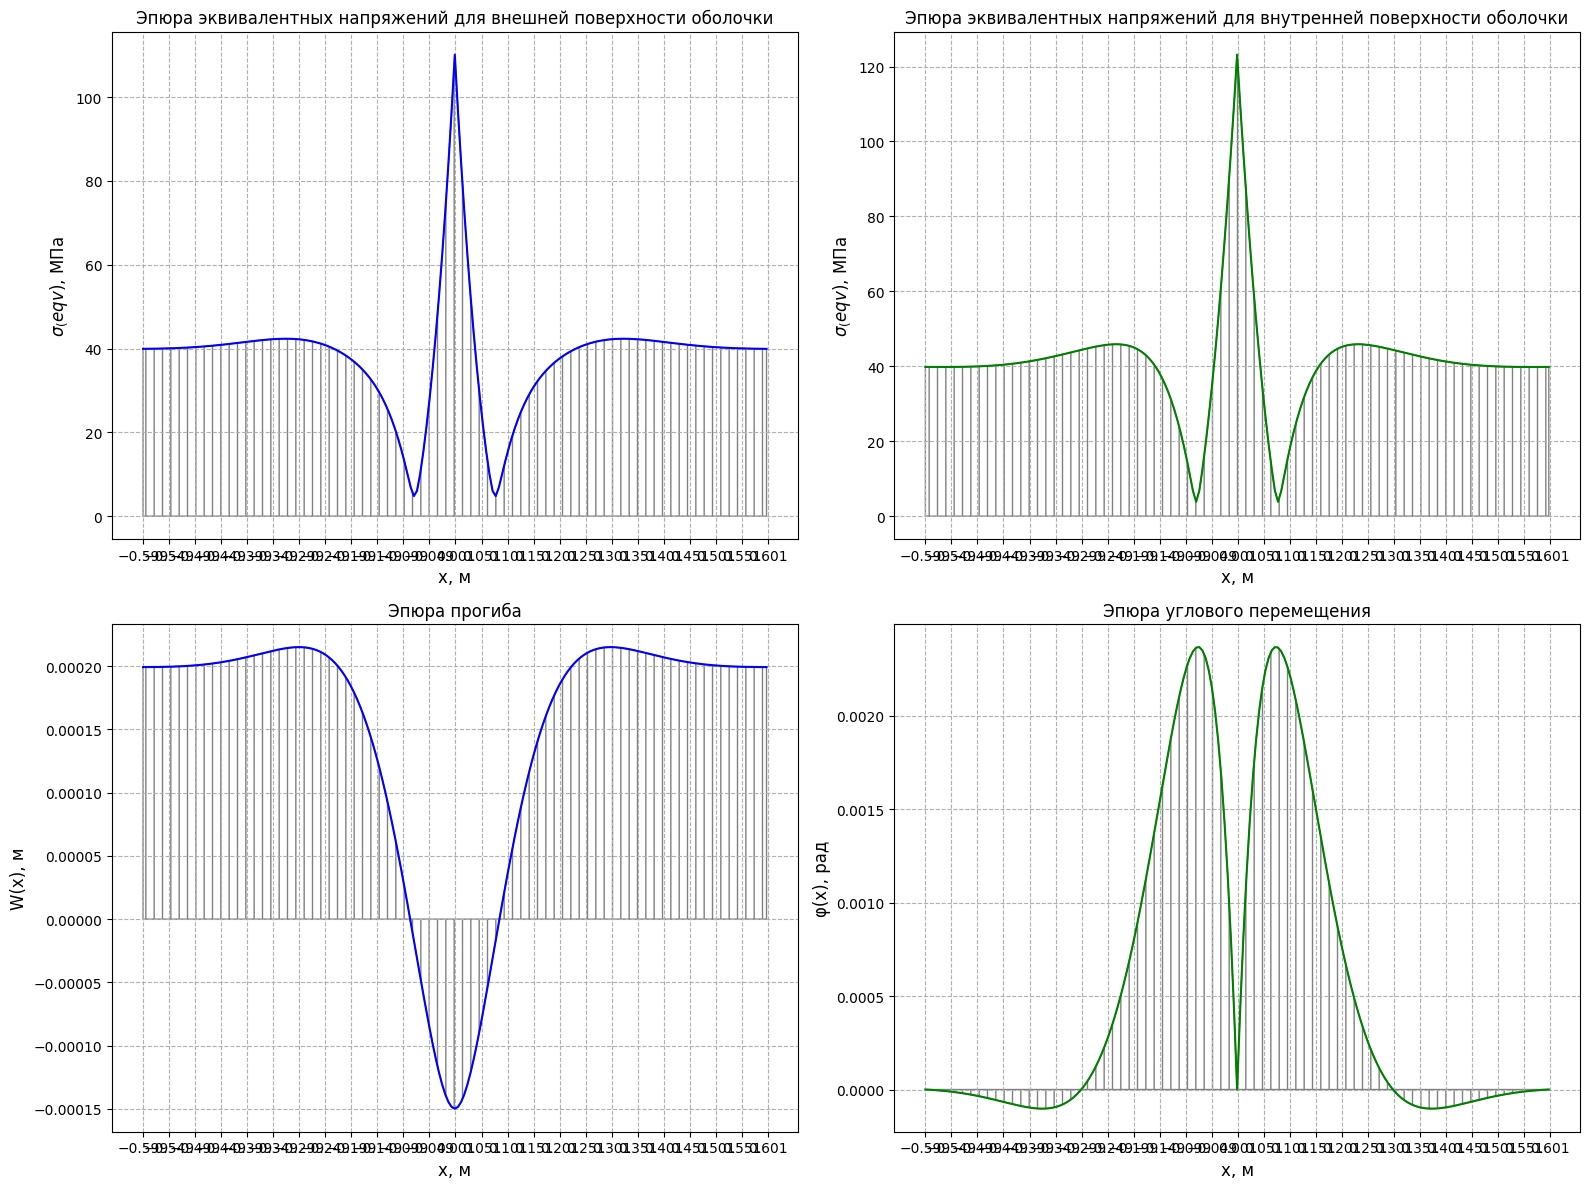

Maximum equivalent stress for inner surface σ_eqv_inner_max = 123.17122167794662 MPa
Maximum equivalent stress for outer surface σ_eqv_outer_max = 110.11516186848603 MPa
Safety factor n = 1.948507100364104


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

## var.10
a = 0.06
R = 1

p0 = 0.6 * 10**6
q = 0.2 * 10**6

E = 200 * 10**9
sigma = 240 * 10**6
Nx = 0
mu = 0.3

h = p0 * R / sigma
print(f'\nЗначение h={h} м\n')
h = 6 * h  # подобранное значение толщины чтобы выполнялся критерий прочности 
print(f'Подогнанное значение h={h} м\n')

D = E * h**3 / (12 * (1 - mu**2))
print(f'\nЦилиндрическая жесткость D={D}\n')

k = (E * h / (4 * D * R**2))**(1 / 4)
print(f'\nВолновое число k={k} м^-1\n')

lambda_ = np.pi / k
print(f'\nДлина краевого эффекта λ={lambda_} м\n')

C = np.array([[-1, 1],  # первое условие- угол поворота в точке разреза( x==0) равен нулю. Второе условие на поперечную силу в точке разреза равную q/2
              [1, 1]])
b = np.array([0, -0.5*q / (2 * D * k**3)])

consts = linalg.solve(C, b)
C1 = consts[0]
C2 = consts[1]
print(f'\nКоэффициенты C равны:\nC1={C1}\nC2={C2}\n')

def W(x):  # Функция прогиба
    return C1 * np.exp(-k * np.abs(x)) * np.cos(k * np.abs(x)) + C2 * np.exp(-k * np.abs(x)) * np.sin(k * np.abs(x)) + p0 * R**2 / (E * h)

def phi(x):  # Функция углового перемещения
    return -k * np.exp(-k * np.abs(x)) * ((C1 - C2) * np.cos(k * np.abs(x)) + (C1 + C2) * np.sin(k * np.abs(x)))

def Mx(x):  # Функция момента Mx
    return 2 * k**2 * np.exp(-k * np.abs(x)) * D * (C1 * np.sin(k * np.abs(x)) - C2 * np.cos(k * np.abs(x)))

def My(x):  # Функция момента My
    return mu * Mx(x)

def Ny(x):  # Функция окружного усиления
    return mu * Nx + E * h / R * W(x)

def Q(x):  # Функция поперечной силы Q
    return 2 * k**3 * D * np.exp(-k * np.abs(x)) * ((C1 + C2) * np.cos(k * np.abs(x)) - (C1 - C2) * np.sin(k * np.abs(x)))

def sigma_x_inner(x):  # Функция напряжения σx для внутренней поверхности оболочки
    return Nx / h + 6 * Mx(x) / h**2

def sigma_x_outer(x):  # Функция напряжения σx для внешней поверхности оболочки
    return Nx / h - 6 * Mx(x) / h**2

def sigma_y_inner(x):  # Функция напряжения σy для внутренней поверхности оболочки
    return Ny(x) / h + 6 * My(x) / h**2

def sigma_y_outer(x):  # Функция напряжения σy для внешней поверхности оболочки
    return Ny(x) / h - 6 * My(x) / h**2

def sigma_eqv_inner(x):  # Функция эквивалентного напряжения для внутренней поверхности оболочки
    return np.sqrt(sigma_x_inner(x)**2 + sigma_y_inner(x)**2 - sigma_x_inner(x) * sigma_y_inner(x))

def sigma_eqv_outer(x):  # Функция эквивалентного напряжения для внешней поверхности оболочки
    return np.sqrt(sigma_x_outer(x)**2 + sigma_y_outer(x)**2 - sigma_x_outer(x) * sigma_y_outer(x))

x_positive = np.linspace(0, 2 * lambda_, 100)
x_negative = np.linspace(-2 * lambda_, 0, 100)

x = np.concatenate((x_negative, x_positive))

plt.figure(figsize=(16, 12))
colors = ['b', 'g'] 

plt.subplot(2, 2, 1)

plt.plot(x, Mx(x) / (10**3), color=colors[0])
plt.fill_between(x, Mx(x) / (10**3), color='none', edgecolor='gray', hatch='||')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('$M_x$(x), кН/м', fontsize=12)
plt.title('Эпюра момента Mx')
plt.grid(True, which="both", ls="--")
plt.xticks(np.arange(-2 * lambda_, 2 * lambda_ + 0.01, 0.05))

plt.subplot(2, 2, 2)

plt.plot(x, My(x) / (10**3), color=colors[1])
plt.fill_between(x, My(x) / (10**3), color='none', edgecolor='gray', hatch='||')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('$M_y$(x), кН/м', fontsize=12)
plt.title('Эпюра момента My')
plt.grid(True, which="both", ls="--")
plt.xticks(np.arange(-2 * lambda_, 2 * lambda_ + 0.01, 0.05))

plt.subplot(2, 2, 3)

plt.plot(x, Ny(x) / (10**6), color=colors[0])
plt.fill_between(x, Ny(x) / (10**6), color='none', edgecolor='gray', hatch='||')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('$N_y$(x), МН/м', fontsize=12)
plt.title('Эпюра окружного усиления')
plt.grid(True, which="both", ls="--")
plt.xticks(np.arange(-2 * lambda_, 2 * lambda_ + 0.01, 0.05))

plt.subplot(2, 2, 4)

plt.plot(x, Q(x) / (10**3), color=colors[1])
plt.fill_between(x, Q(x) / (10**3), color='none', edgecolor='gray', hatch='||')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('Q(x), кН', fontsize=12)
plt.title('Эпюра поперечной силы Q')
plt.grid(True, which="both", ls="--")
plt.xticks(np.arange(-2 * lambda_, 2 * lambda_ + 0.01, 0.05))

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 12))
colors = ['b', 'g'] 

plt.subplot(2, 2, 1)

plt.plot(x, sigma_eqv_outer(x) / (10**6), color=colors[0])
plt.fill_between(x, sigma_eqv_outer(x) / (10**6), color='none', edgecolor='gray', hatch='||')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('$σ_(eqv)$, МПа', fontsize=12)
plt.title('Эпюра эквивалентных напряжений для внешней поверхности оболочки')
plt.grid(True, which="both", ls="--")
plt.xticks(np.arange(-2 * lambda_, 2 * lambda_ + 0.01, 0.05))

plt.subplot(2, 2, 2)

plt.plot(x, sigma_eqv_inner(x) / (10**6), color=colors[1])
plt.fill_between(x, sigma_eqv_inner(x) / (10**6), color='none', edgecolor='gray', hatch='||')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('$σ_(eqv)$, МПа', fontsize=12)
plt.title('Эпюра эквивалентных напряжений для внутренней поверхности оболочки')
plt.grid(True, which="both", ls="--")
plt.xticks(np.arange(-2 * lambda_, 2 * lambda_ + 0.01, 0.05))

plt.subplot(2, 2, 3)

plt.plot(x, W(x), color=colors[0])
plt.fill_between(x, W(x), color='none', edgecolor='gray', hatch='||')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('W(x), м', fontsize=12)
plt.title('Эпюра прогиба')
plt.grid(True, which="both", ls="--")
plt.xticks(np.arange(-2 * lambda_, 2 * lambda_ + 0.01, 0.05))

plt.subplot(2, 2, 4)

plt.plot(x, phi(x), color=colors[1])
plt.fill_between(x, phi(x), color='none', edgecolor='gray', hatch='||')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('φ(x), рад', fontsize=12)
plt.title('Эпюра углового перемещения')
plt.grid(True, which="both", ls="--")
plt.xticks(np.arange(-2 * lambda_, 2 * lambda_ + 0.01, 0.05))

plt.tight_layout()
plt.show()
sigma_eqv_inner_max = np.max(np.abs(sigma_eqv_inner(x)))
sigma_eqv_outer_max = np.max(np.abs(sigma_eqv_outer(x)))
print('Maximum equivalent stress for inner surface σ_eqv_inner_max =', sigma_eqv_inner_max / 1e6, 'MPa')
print('Maximum equivalent stress for outer surface σ_eqv_outer_max =', sigma_eqv_outer_max / 1e6, 'MPa')
if sigma_eqv_inner_max > sigma_eqv_outer_max:
    n = sigma / sigma_eqv_inner_max
else:
    n = sigma / sigma_eqv_outer_max
print('Safety factor n =', n)